In [1]:
"""Additive method - seasonal variation are rounghly constant
Multiplicative method - seasonal variation are changing proportional to level of series"""

'Additive method - seasonal variation are rounghly constant\nMultiplicative method - seasonal variation are changing proportional to level of series'

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("airline-passengers.csv", index_col="Month", parse_dates=True)
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
df=df.dropna()

In [5]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [6]:
### above "freq = None" so convert it into "MS" --> Month start frequency. More --> Pandas timeseries

df.index.freq='MS'


In [7]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [8]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


#### Simple Smoothing

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [10]:
span = 12
alpha = 2/(span+1)

In [11]:
df['EWMA12'] = df['Passengers'].ewm(alpha=alpha, adjust=False).mean()

In [12]:
df.head()

,Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861


In [13]:
model = SimpleExpSmoothing(df['Passengers'])

In [14]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [15]:
fitted_model.fittedvalues

Month
1949-01-01    112.000000
1949-02-01    112.000000
1949-03-01    112.923077
1949-04-01    115.857988
1949-05-01    117.879836
                 ...    
1960-08-01    474.698368
1960-09-01    494.898619
1960-10-01    496.914216
1960-11-01    491.388952
1960-12-01    475.790652
Freq: MS, Length: 144, dtype: float64

In [16]:
fitted_model.fittedvalues.shift(-1)

Month
1949-01-01    112.000000
1949-02-01    112.923077
1949-03-01    115.857988
1949-04-01    117.879836
1949-05-01    118.359861
                 ...    
1960-08-01    494.898619
1960-09-01    496.914216
1960-10-01    491.388952
1960-11-01    475.790652
1960-12-01           NaN
Freq: MS, Length: 144, dtype: float64

In [17]:
df['Sim_smooth_12'] = fitted_model.fittedvalues.shift(-1)

In [18]:
df.head(5)

,Passengers,EWMA12,Sim_smooth_12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861


<Axes: xlabel='Month'>

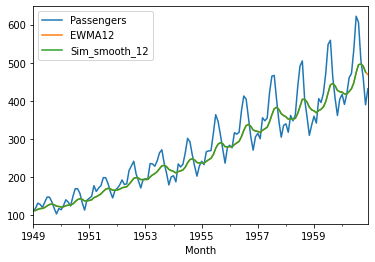

In [21]:
df.plot()

#### Double exponential smoothing using add

In [19]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
## trend --> "add" because plot above seems mostly constant
df["double_smooth_12"] = ExponentialSmoothing(df['Passengers'], trend='add').fit().fittedvalues.shift(-1)

In [23]:
df.head(5)

,Passengers,EWMA12,Sim_smooth_12,double_smooth_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263


<Axes: xlabel='Month'>

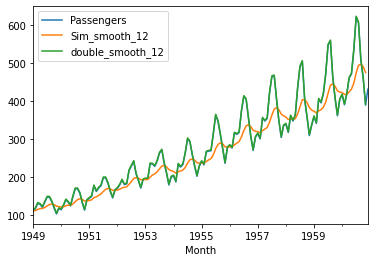

In [24]:
df[['Passengers', 'Sim_smooth_12', 'double_smooth_12']].plot()

<Axes: xlabel='Month'>

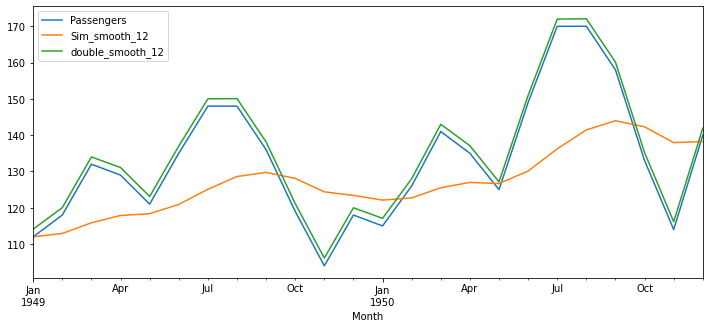

In [25]:
## Zoom in
df[['Passengers', 'Sim_smooth_12', 'double_smooth_12']].iloc[:24].plot(figsize=(12,5))

## conclusion --> well fitted data as shown

#### Double exponential smoothing using Mul

<Axes: xlabel='Month'>

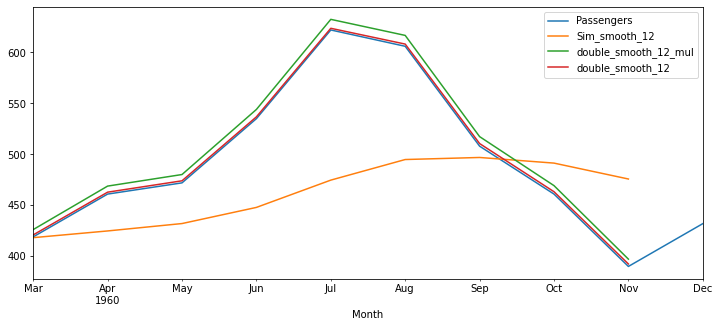

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## trend --> "add" because plot above seems mostly constant
df["double_smooth_12_mul"] = ExponentialSmoothing(df['Passengers'], trend='mul').fit().fittedvalues.shift(-1)

# df[['Passengers', 'Sim_smooth_12', 'double_smooth_12']].plot()

df[['Passengers', 'Sim_smooth_12', 'double_smooth_12_mul', 'double_smooth_12']].iloc[-10:].plot(figsize=(12,5))

#### Triple exponential smoothing using Mul

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## trend & Seasonal--> trend going exponential and seasonal going proposal to time so "Mul"
df["triple_smooth_12"] = ExponentialSmoothing(df['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

C:\Users\CHS9NA\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: xlabel='Month'>

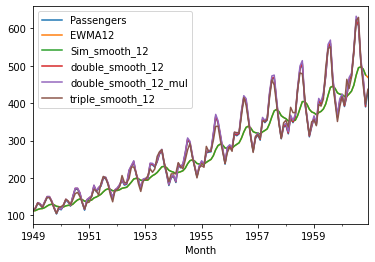

In [30]:
df.plot()

<Axes: xlabel='Month'>

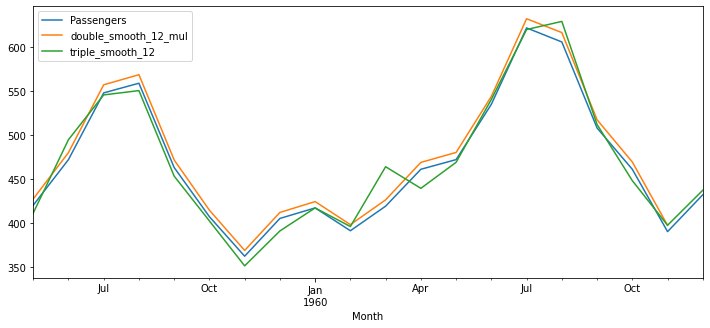

In [32]:
df[['Passengers', 'double_smooth_12_mul', 'triple_smooth_12']].iloc[-20:].plot(figsize=(12,5))